In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
train='/content/drive/MyDrive/d/training_set'
test='/content/drive/MyDrive/d/testing_data'

In [3]:
import os
train_healthy= '/content/drive/MyDrive/d/training_set/healthy'
train_unhealhy='/content/drive/MyDrive/d/training_set/unhealthy'

In [4]:
"Check number of trainingset"
train_healthy=os.listdir(train_healthy)
train_unhealhy=os.listdir(train_unhealhy)
print(len(train_healthy))
print(len(train_unhealhy))

49
51


Model Building

In [5]:
model=tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(25,25,3)),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [6]:
opt_Adams = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt_Adams, metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_data=ImageDataGenerator(rescale=1/255 , rotation_range = 40,width_shift_range = 0.2,height_shift_range = 0.2,
                              shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True,fill_mode='nearest')
test_data=ImageDataGenerator(rescale=1/255)

In [9]:
train_gen=train_data.flow_from_directory(train, batch_size=50, target_size=(25,25), class_mode='binary')
test_gen= test_data.flow_from_directory(test, batch_size=50, target_size=(25,25), class_mode='binary')

Found 100 images belonging to 2 classes.
Found 117 images belonging to 2 classes.


In [10]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True
            print("Validation Accuracy reached 90%")


In [11]:
hist=model.fit(train_gen, steps_per_epoch=2, 
          epochs=15, validation_data=test_gen, validation_steps=3, verbose=2, callbacks = [MyThresholdCallback(threshold=0.9)])

Epoch 1/15
2/2 - 18s - loss: 0.6856 - accuracy: 0.5100 - val_loss: 0.6359 - val_accuracy: 0.5726 - 18s/epoch - 9s/step
Epoch 2/15
2/2 - 13s - loss: 0.6567 - accuracy: 0.5100 - val_loss: 0.6197 - val_accuracy: 0.5897 - 13s/epoch - 7s/step
Epoch 3/15
2/2 - 13s - loss: 0.6332 - accuracy: 0.7200 - val_loss: 0.5850 - val_accuracy: 0.6752 - 13s/epoch - 7s/step
Epoch 4/15
2/2 - 13s - loss: 0.6109 - accuracy: 0.7000 - val_loss: 0.5471 - val_accuracy: 0.6068 - 13s/epoch - 7s/step
Epoch 5/15
2/2 - 13s - loss: 0.5686 - accuracy: 0.7800 - val_loss: 0.5090 - val_accuracy: 0.8547 - 13s/epoch - 7s/step
Epoch 6/15
2/2 - 13s - loss: 0.5316 - accuracy: 0.9200 - val_loss: 0.4649 - val_accuracy: 0.8718 - 13s/epoch - 7s/step
Epoch 7/15
Validation Accuracy reached 90%
2/2 - 13s - loss: 0.4996 - accuracy: 0.8900 - val_loss: 0.4230 - val_accuracy: 0.9145 - 13s/epoch - 7s/step


Make Predictions

In [33]:
"Directory to picture to be predicted"
m='/content/drive/MyDrive/d/testing_data/test_healthy/healthy.1677.jpg'

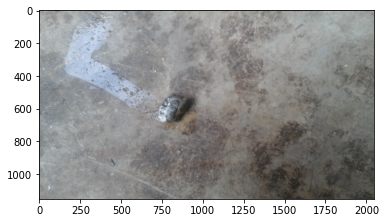

In [34]:
from keras.preprocessing import image
x=plt.imread(m)
plt.imshow(x)

In [35]:
from keras.preprocessing import image
img=image.load_img(m, target_size=(25,25))
img=image.img_to_array(img)
x=np.expand_dims(img, axis=0)
images = np.vstack([x])
if model.predict(images)[0][0] < 1:
  print("Healthy")
else:
  print("Unhealthy")

Healthy
